In [45]:
import pandas as pd
import os, sys
import re

In [46]:
csv_list = [csv for csv in os.listdir() if ('csv' in csv)]

In [43]:
def clean_text(text):
    cleaned_text = re.sub('[^ ㄱ-ㅣ가-힣]+',' ',text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

In [39]:
col = ['언론사', '제목', '내용']
data = pd.DataFrame(columns=col)
for idx, x in enumerate(csv_list):
    try:
        data = data.append(pd.read_csv(x, encoding='CP949'))
    except:
        data = data.append(pd.read_csv(x))
        print('nnnn')

nnnn
nnnn
nnnn
nnnn
nnnn
nnnn
nnnn
nnnn
nnnn
nnnn


In [54]:
data['내용'] = data['내용'].apply(lambda x : clean_text(str(x)))

In [55]:
data['내용']

0    지난 일 사회관계망서비스에서는 차밑에 들어가 있는 한 노동자의 사진이 화제를 모았다...
1    풀무원 홀딩스는 초등학교 여름방학을 맞아 충북 음성 풀무원 두부공장을 돌아보는 풀무...
2    그릭 요거트가 인기다 그리스 등 지중해 연안지역 가정에서 만들어 먹던 영양이 풍부하...
3    혈관 장 건강 돕는 유산균 오메가 한 병에 담아 풀무원건강생활 유산균음료 전문 브랜...
4    풀무원베이비밀이 생후 백일이 지나고 만 개월부터 시작하는 이유식의 중요성을 알리기 ...
                           ...                        
2    풀무원이 년 이후 년 만에 기업이미지 를 교체하고 계열사 브랜드 체계를 일원화했다 ...
3    기업의 비 재무적 성과를 뜻하는 환경 사회 지배구조 경영이 유통업계의 주요한 생존 ...
4    기업의 비 재무적 성과를 뜻하는 환경 사회 지배구조 경영이 유통업계의 주요한 생존 ...
5    기업의 비 재무적 성과를 뜻하는 환경 사회 지배구조 경영이 유통업계의 주요한 생존 ...
6    기업의 비 재무적 성과를 뜻하는 환경 사회 지배구조 경영이 유통업계의 주요한 생존 ...
Name: 내용, Length: 211, dtype: object

C:\python_anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
<ipython-input-56-5179b88774ce>:38: ConvergenceWarning: Number of distinct clusters (203) found smaller than n_clusters (204). Possibly due to duplicate points in X.
  km.fit(tfidf)
<ipython-input-56-5179b88774ce>:38: ConvergenceWarning: Number of distinct clusters (203) found smaller than n_clusters (205). Possibly due to duplicate points in X.
  km.fit(tfidf)
<ipython-input-56-5179b88774ce>:38: ConvergenceWarning: Number of distinct clusters (203) found smaller than n_clusters (206). Possibly due to duplicate points in X.
  km.fit(tfidf)
<ipython-input-56-5179b88774ce>:38: ConvergenceWarning: Number of distinct clusters (203) found smaller than n_clusters (207). Possibly due to duplicate points in X.
  km.f

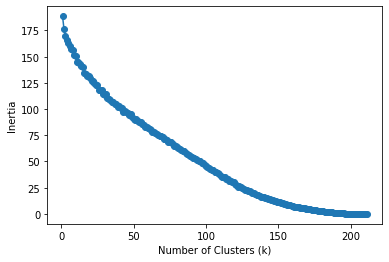

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

from konlpy.tag import Okt
import re

def get_nouns(text):
    nouns = okt.nouns(text)
    nouns = [word for word in nouns if len(word) > 1] # 명사중 길이가 1 이상만
    nouns = [word for word in nouns if not re.match(r'\d+',word)] # 숫자 제거
    return nouns

okt = Okt()

cv = TfidfVectorizer(max_features=1000, tokenizer=get_nouns)
tfidf = cv.fit_transform(data['내용'])
# print('tfidf : ',tfidf)

tfidf = tfidf.toarray()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

km = KMeans(n_clusters=4)
km.fit(tfidf)

data['cluster'] = km.labels_
data.head()

num_clusters = list(range(1, len(data)+1))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    km = KMeans(n_clusters=i)
    km.fit(tfidf)
    inertias.append(km.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()